# Data Preprocessing - Stroke Disease Prediction

Berikut tahapan proses menyiapkan data sebelum digunakan untuk melatih model machine learning.
Adapun library yang kita butuhkan seperti, 
1. Pandas
    => untuk menampung dataset kedalam bentuk dataframe agar mempermudah manipulasi data
2. Numpy
    => untuk mengubah dataframe kebentuk array jika diperlukan atau untuk keperluan scaling
3. Scikit-learn
    => digunakan untuk melakukan preprocessing seperti encoding, scaling, dan data spliting
4. matplotlib & seaborn
    => untuk memeriksa dan menampilkan data dalam bentuk visualisasi agar lebih sederhana untuk dipahami

## Exploratory Data Analyst

Setelah mengimport library dan dataset kedalam dataframe
lakukan EDA untuk mengenali dataset yang digunakan.
1. Periksa struktur, kolom atau atribute
2. Periksa tipe data nilai setiap kolom
3. Pilih atribute yang digunakan

In [1]:
#Import Library yang dibutuhkan

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Panggil dataset ke dalam dataFrame

data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [3]:
#Melihat jumlah baris dan kolom dataset

data.shape

(5114, 12)

In [4]:
#Memeriksa jenis tipe data pada setiap atribute dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5114 non-null   int64  
 1   gender             5114 non-null   object 
 2   age                5114 non-null   float64
 3   hypertension       5114 non-null   int64  
 4   heart_disease      5114 non-null   int64  
 5   ever_married       5114 non-null   object 
 6   work_type          5114 non-null   object 
 7   Residence_type     5114 non-null   object 
 8   avg_glucose_level  5114 non-null   float64
 9   bmi                4912 non-null   float64
 10  smoking_status     5114 non-null   object 
 11  stroke             5114 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.6+ KB


In [5]:
#Pilih kolom / atribute apa saja yang akan digunakan

data = data[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'Residence_type','avg_glucose_level','bmi','smoking_status','stroke']]

In [6]:
data.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#Rename / Ubah nama kolom

data = data.rename(columns={'age':'umur', 'hypertension':'tensi', 'heart_disease':'riwayat jantung', 'work_type':'tipe kerja', 'Residence_type':'tempat tinggal', 'avg_glucose_level':'gula darah', 'bmi':'berat badan', 'smoking_status':'perokok'})

In [8]:
data.head(2)

,gender,umur,tensi,riwayat jantung,tipe kerja,tempat tinggal,gula darah,berat badan,perokok,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1


# Pre Processing

Setelah memeriksa atribute atau kolom yang akan digunakan, kemudian data akan dilakukan proses preprocessing seperti :

## 1. Data Cleaning

Bertujuan untuk membersihkan data dari nilai-nilai yang tidak valid / bernilai null dan data yang duplikat agar ketika dataset digunakan untuk melatih model machine learning meminimalisir terjadinya error dan tingkat akurasi yang rendah.

### Data cleaning nilai numerical

In [9]:
#Memeriksa jumlah nilai yang tidak valid / null pada setiap kolom / atribute

data.isna().sum()

gender               0
umur                 0
tensi                0
riwayat jantung      0
tipe kerja           0
tempat tinggal       0
gula darah           0
berat badan        202
perokok              0
stroke               0
dtype: int64

In [10]:
#Memeriksa mean / rata-rata nilai setiap kolom

data.mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18016\4208079246.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


umur                43.235237
tensi                0.097771
riwayat jantung      0.053969
gula darah         106.126521
berat badan         28.891511
stroke               0.049081
dtype: float64

In [11]:
#Isi kolom yang bernilai null dengan mean / rata-rata nilai pada kolom tersebut

data = data.fillna(data.mean())

C:\Users\Acer\AppData\Local\Temp\ipykernel_18016\3739932664.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [12]:
data.isna().sum()

gender             0
umur               0
tensi              0
riwayat jantung    0
tipe kerja         0
tempat tinggal     0
gula darah         0
berat badan        0
perokok            0
stroke             0
dtype: int64

In [13]:
#Memeriksa jumlah data yang duplikat

data.duplicated().sum()

4

In [14]:
data[data.duplicated()]

,gender,umur,tensi,riwayat jantung,tipe kerja,tempat tinggal,gula darah,berat badan,perokok,stroke
5110,Female,78.0,0,0,Private,Urban,58.57,24.200000,Unknown,1
5111,Female,81.0,1,0,Private,Rural,80.43,29.700000,never smoked,1
5112,Female,45.0,1,0,Govt_job,Rural,95.02,28.891511,smokes,0
5113,Male,13.0,0,0,children,Urban,82.38,24.300000,Unknown,0


In [15]:
#Menghapus data yang duplikat

data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

### Data cleaning nilai kategorikal

In [17]:
#Memeriksa nilai pada kolom gender

data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

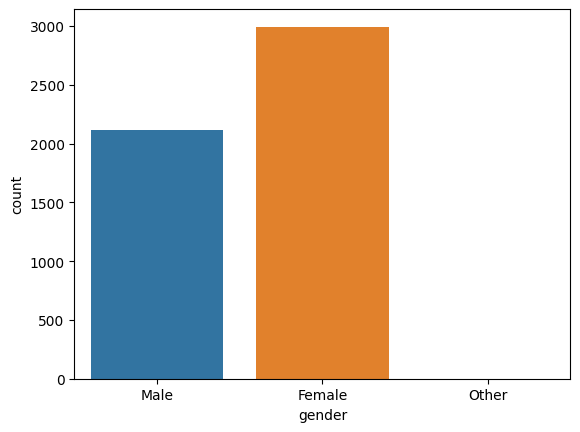

In [18]:
#Memeriksa nilai pada kolom gender menggunakan visualisasi seaborn

sns.countplot(data=data, x=data['gender'])

In [19]:
#Hapus record yang bernilai Other pada kolom gender

data.drop(data[data['gender'] == 'Other'].index, inplace=True)

In [20]:
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [21]:
#Memeriksa nilai kolom tipe kerja

data['tipe kerja'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: tipe kerja, dtype: int64

<AxesSubplot:xlabel='tipe kerja', ylabel='count'>

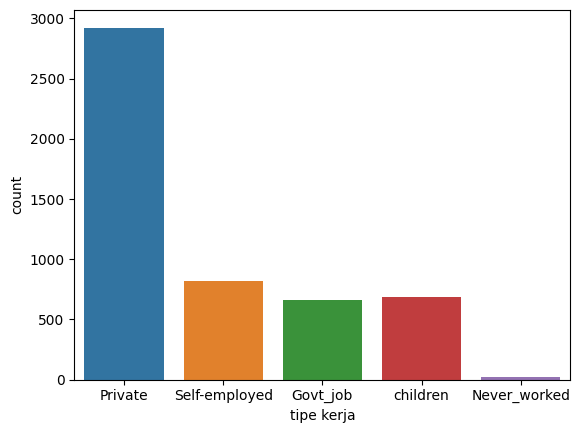

In [22]:
sns.countplot(data=data, x=data['tipe kerja'])

In [23]:
#Memeriksa nilai kolom tempat tinggal

data['tempat tinggal'].value_counts()

Urban    2596
Rural    2513
Name: tempat tinggal, dtype: int64

<AxesSubplot:xlabel='tempat tinggal', ylabel='count'>

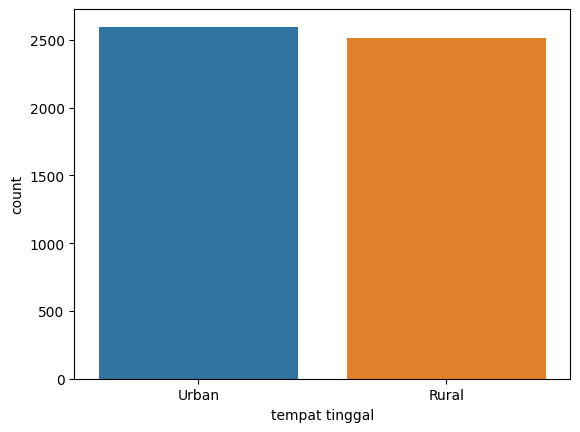

In [24]:
sns.countplot(data=data, x=data['tempat tinggal'])

In [25]:
#Memeriksa nilai kolom perokok

data['perokok'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: perokok, dtype: int64

<AxesSubplot:xlabel='perokok', ylabel='count'>

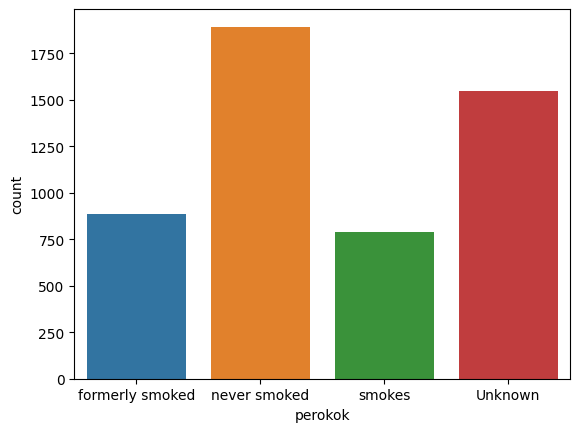

In [26]:
sns.countplot(data=data, x=data['perokok'])

In [27]:
data.shape

(5109, 10)

In [28]:
#Hapus kolom rokok

data.drop(['perokok'], axis=1, inplace=True)

In [29]:
data.head()

,gender,umur,tensi,riwayat jantung,tipe kerja,tempat tinggal,gula darah,berat badan,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.600000,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.891511,1
2,Male,80.0,0,1,Private,Rural,105.92,32.500000,1
3,Female,49.0,0,0,Private,Urban,171.23,34.400000,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.000000,1


## 2. Encoding

Bertujuan untuk mengubah nilai kategorikal menjadi numerical agar mempermudah machine learning untuk memberi label nilai kategorikal yang memiliki bentuk awal string atau object.

In [30]:
#import fungsi label encoder dari sklearn

from sklearn.preprocessing import LabelEncoder

#### Catatan

Lakukan encoding terhadap nilai kategorikal yang bernilai 2 jenis saja, seperti benar dan salah, laki-laki dan perempuan, dan sebagainya, agar ketika di encoding nilai berubah menjadi nilai biner atau 0 dan 1.

In [31]:
#lakukan encoding pada kolom gender

le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])

In [32]:
data.head()

,gender,umur,tensi,riwayat jantung,tipe kerja,tempat tinggal,gula darah,berat badan,stroke
0,1,67.0,0,1,Private,Urban,228.69,36.600000,1
1,0,61.0,0,0,Self-employed,Rural,202.21,28.891511,1
2,1,80.0,0,1,Private,Rural,105.92,32.500000,1
3,0,49.0,0,0,Private,Urban,171.23,34.400000,1
4,0,79.0,1,0,Self-employed,Rural,174.12,24.000000,1


In [33]:
#Encoding kolom tempat tinggal

data['tempat tinggal'] = le.fit_transform(data['tempat tinggal'])

In [34]:
data.head()

,gender,umur,tensi,riwayat jantung,tipe kerja,tempat tinggal,gula darah,berat badan,stroke
0,1,67.0,0,1,Private,1,228.69,36.600000,1
1,0,61.0,0,0,Self-employed,0,202.21,28.891511,1
2,1,80.0,0,1,Private,0,105.92,32.500000,1
3,0,49.0,0,0,Private,1,171.23,34.400000,1
4,0,79.0,1,0,Self-employed,0,174.12,24.000000,1


In [35]:
#Encoding kolom tipe kerja menjadi kolom baru

data = pd.get_dummies(data, columns=['tipe kerja'])

In [36]:
data.head()

,gender,umur,tensi,riwayat jantung,tempat tinggal,gula darah,berat badan,stroke,tipe kerja_Govt_job,tipe kerja_Never_worked,tipe kerja_Private,tipe kerja_Self-employed,tipe kerja_children
0,1,67.0,0,1,1,228.69,36.600000,1,0,0,1,0,0
1,0,61.0,0,0,0,202.21,28.891511,1,0,0,0,1,0
2,1,80.0,0,1,0,105.92,32.500000,1,0,0,1,0,0
3,0,49.0,0,0,1,171.23,34.400000,1,0,0,1,0,0
4,0,79.0,1,0,0,174.12,24.000000,1,0,0,0,1,0


In [37]:
data.to_csv('dataset_baru.csv')

## 3. Data Spliting

Bertujuan untuk membagi data menjadi beberapa bagian, biasanya dibagi menjadi 2 yaitu data training dan data testing.
1. Data Training
    => digunakan untuk bahan latih machine learning untuk mempelajari pola dataset
2. Data Testing
    => digunakan untuk mengevaluasi model machine learning dengan data diluar data training dengan tujuan melihat tingkat akurasi

In [38]:
#import fungsi train_test_split dari sklearn

from sklearn.model_selection import train_test_split

#tentukan label dan atribute ke dalam nilai x dan y

x = data.drop('stroke', axis=1)
y = data['stroke']

In [39]:
#Lakukan spliting data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [40]:
#Periksa jumlah data setelah di spliting

x_train.shape

(3576, 12)

In [41]:
y_train.shape

(3576,)

In [42]:
x_train.head()

,gender,umur,tensi,riwayat jantung,tempat tinggal,gula darah,berat badan,tipe kerja_Govt_job,tipe kerja_Never_worked,tipe kerja_Private,tipe kerja_Self-employed,tipe kerja_children
4039,1,15.0,0,0,0,74.83,17.4,0,0,0,0,1
576,1,29.0,0,0,1,207.58,22.8,0,0,1,0,0
4013,1,44.0,1,0,0,91.28,26.5,0,0,1,0,0
4536,0,68.0,1,0,1,150.74,40.3,0,0,1,0,0
1180,0,62.0,0,0,0,82.57,36.0,0,0,1,0,0


In [43]:
#save dataset yang telah dibagi

x_train.to_csv('x_train.csv')
y_train.to_csv('y_train.csv')
x_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')

## 4. Scaling

Bertujuan untuk merubah nilai numerical ke nilai dengan skala koma atau 0 sampai 1 agar mempermudah machine learning untuk melatih model yang sudah diubah skala dan bentuk dari dataframe ke dalam array numpy

In [44]:
# Import fungsi standard scaler dari sklearn

from sklearn.preprocessing import StandardScaler

In [45]:
#Lakukan scaling pada data training

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [46]:
print(x_train)

[[ 1.18321596 -1.24098632 -0.31617913 ... -1.15375923 -0.43636313
   2.52451894]
 [ 1.18321596 -0.62269788 -0.31617913 ...  0.86673196 -0.43636313
  -0.39611507]
 [ 1.18321596  0.03975403  3.16276413 ...  0.86673196 -0.43636313
  -0.39611507]
 ...
 [-0.84515425 -1.85220862 -0.31617913 ... -1.15375923 -0.43636313
   2.52451894]
 [-0.84515425 -0.22522673 -0.31617913 ... -1.15375923 -0.43636313
  -0.39611507]
 [-0.84515425  0.12808095 -0.31617913 ...  0.86673196 -0.43636313
  -0.39611507]]
